### Урок 6. #Задача lookalike (Positive Unlabeled Learning)#

Программа урока:
1. Теоретическая часть:

     - Задача обучения с учителем (повторение)
     - Примеры кейсов, когда разметка содержит только наблюдения положительного класса
     - Какие задачи не относятся к lookalike


2. Практическая часть
    - Метод решения random negative sampling
    - Метод 2-step approach
    - Метод spy
    - Сравнение методов между собой на датасете, для которого метки известны
    - Сравнение лучшего метода с моделью, построенной на данных, для которых известны метки всех классов

![ab_split](supervised_learning.png "churn1")

Т.е в "стандартной" постановке задачи обучения с учителем у нас есть разметка.

Например, если мы решаем задачу бинарной классификации, то у нас есть объекты с метками обоих классов (positive/negative).

На практике часто бывает так, что мы сравнительно легко можем определить объекты одного класса (дпопустим, мы легко понимаем, какие объекты можно назвать положительными), но при этом возникают сложности с определением объектов другого класса (негативы).

Речь идет именно о формировании датасета!

Примеры задач:

- Продвижение услуг и приложений
- Выделение сегмента пользователей, которые совершат нужное нам целевое действие

Отдельный момент - каналы взаимодействия с пользователями (смс, пуши, реклама в соцсетях, звонки и т.д)

#### Какие задачи не относятся к PU Learning

- Small-training dataset
- Outlier detection

#### Поиск выбросов

![ab_split](outlier.png "outliers")

#### Пример задачи

![ab_split](example1.png "example1")

Пример: есть сегмент пользователей, которым нравится футбол. Мы хотим находить "похожих".

Возможное (очевидное) решение - построить бинарный классификатор, который будет отличать тех, кому нравится футбол от тех, кому он не нравится.

Проблема - нет понимания что считать "негативами"

Чуть ближе к ML

![ab_split](example2.png "example2")

### Более формальное описание задачи

1. оценивается вероятность того, что пользователь совершит некоторое целевое действие (приобретение подписки, установка или регистрация в приложении и т.д)
2. У нас есть только те, кто совершил это действие - это positives. При этом нет определения того, что такое negative. Все, кроме P - Unlabeled (U)
3. Нам нужно как-то собрать выборку и обучить модель, которая будет отличать P от N 

Получаем такие обозначения: P, U, N (в начале есть только первые 2)

Еще пример

![ab_split](example3.png "example3")

### Пример

- Есть «хорошие» пользователи, совершившие целевое действие - P
- Для них мы храним логи + дополнительную информацию
- Также у нас есть хранилище признаков для каждого пользователя
- Все, что не P, относится к неразмеченным - U


Задача: построить модель, которая будет определять степень принадлежности пользователя x к P (вероятность p(y=1|x) или что-то вроде)


Например (во второй половине занятия будет практика), мы работаем в ритейле и хотим устроить распродажу чая. При этом хотим делать это адресно (а не случайно формируя сегмент).

Мы можем отобрать из базы клиентов, которые покупали чай ранее (скорее всего эффективность распродажи для них будет экономически эффективнее). Проблемы:
- таких клиентов набирается мало
- если клиент не покупал чай, то это вовсе не означает, что он (чай) клиенту не нравится
- определенно есть те, кто предпочитает кофе (или просто не любит чай)

Получаем пример задачи, которую можно решать как задачу lookalike

Мы не будем рассматривать варианты с обучением без учителя (теоретически вполне себе возможно)

Обучение на PU данных нетривиально. Существует 2 возможных объяснения, почему конкретный объект не имеет метки класса:
1. это объект класса 0 (True negative)
2. это объект класса 1, но просто неразмеченный

### PU learning (варианты решения)

1. Random negative sampling
2. 2-step approach
3. SPY
4. … (много других)

Другие обозначения:

1. random negative sampling -> The Selected Completely At Random (SCAR)


### 1. Random negative sampling

![ab_split](pu_random.png "PU random")

### 2-step approach

![ab_split](pu_2step.png "PU 2-step")

#### Или словами:

1. определяем RN (reliable negatives). Здесь же бывают алгоритмы, в которых также размечаются дополнительно positives из множества Unlabeled (U). 
2. Используем метод обучения с учителем (на самом деле, не совсем - это называется semi-supervised) для обучения классификатора на P, RN
3. (когда применимо) Выбирается лучший классификатор с шага 2

### 3. алгоритм Spy

![ab_split](pu_spy.png "PU Spy")

#### Небольшие пояснения

- random negative sampling основан на предположении, что размеченные данные являются iid выборкой из множества положительных примеров

iid - Independent and identically distributed (примеры независимы и одинаково распределены)

- random negative sampling очень популярен, но главным образом благодаря тому, что проблема в итоге сводится к задаче бинарной классификации

Ниже на картинке пример, если размеченные данные (Labeled Positive) выбраны независимо и равновероятно из генеральной совокупности (множества всех позитивов - Unlabeled Positive)

![ab_split](PU_SCAR.png "PU SCAR")

Ниже на картинке пример, где мы уже видим, что семплирование смещено. 

![ab_split](PU_SAR.png "PU SAR")

#### Есть и более простой способ - разметить все неразмеченные данные как Negatives!

Но конечно такой метод на практике почти не используется, хотя и очень прост и понятен.

### Ссылки

1. https://arxiv.org/pdf/1811.04820.pdf

### Пример

1. сгенерируем игрушечный датасет из двух множеств так, чтобы они немного пересекались с помощью https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [1]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

2. Нарисуем график с нашими и данными. Часть данных (250 примеров) размечена как позитивы, остальные - неразмечены

labeled samples: 250


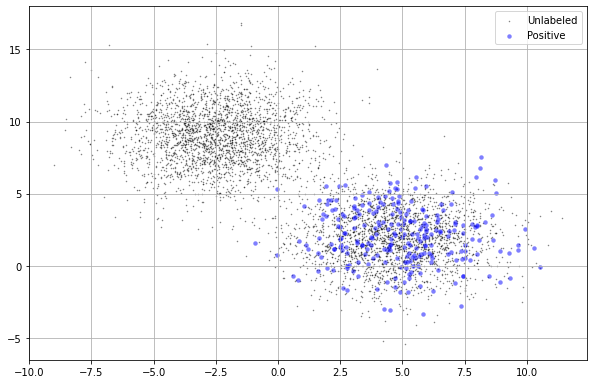

In [2]:
N = 5000
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=2.0, random_state=42)
rp = np.random.permutation(int(N/2))
data_P = X[y==1][rp[:int(len(rp)*known_labels_ratio)]]
data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
print("labeled samples: %d" % (data_P.shape[0]))
plt.figure(figsize=(10, 6.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', linewidth=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', linewidth=0, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend()

3. Обучим 1000 деревьев решений, используя bagging
4. Предсказания делаем oob (out-of-the-bag) и затем для каждого примера мы все прогнозы усредняем

Что такое bagging (ссылка - https://en.wikipedia.org/wiki/Bootstrap_aggregating)

![ab_split](bagging.png "bagging")

In [3]:
NP = data_P.shape[0]
NU = data_U.shape[0]

T = 1000
K = NP
train_label = np.zeros(shape=(NP+K,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))
for i in range(T):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=K)
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)
    # Train model
    model = DecisionTreeClassifier(max_depth=None, max_features=None, 
                                   criterion='gini', class_weight='balanced')
    model.fit(data_bootstrap, train_label)
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1
predict_proba = f_oob[:, 1]/n_oob

5. наконец, посчитаем Precision, Recall и оптимальный порог и посмотрим, как наш алгоритм справился (ведь мы для наших данных знаем реальные метки классов)

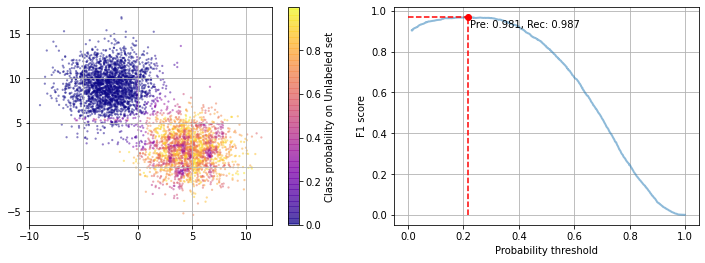

In [4]:
# Plot the class probabilities for the unlabeled samples
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
sp= ax1.scatter(data_U[:, 0], data_U[:, 1], c=predict_proba, 
                linewidth=0, s=5, alpha=0.5, cmap=plt.cm.plasma, label='unlabeled')
plt.grid()
plt.colorbar(sp, label='Class probability on Unlabeled set')

true_labels = np.zeros(shape=(data_U.shape[0]))
true_labels[:int(len(rp)*(1.0-known_labels_ratio))] = 1.0
precision, recall, th = precision_recall_curve(true_labels, predict_proba)
ax2 = fig.add_subplot(1, 2, 2)
f1s = precision[:-1]*recall[:-1]
ax2.plot(th, f1s, linewidth=2, alpha=0.5)
best_th = np.argmax(f1s)
ax2.plot(th[best_th], f1s[best_th], c='r', marker='o')
ax2.plot([th[best_th], th[best_th]], [0.0,f1s[best_th] ], 'r--')
ax2.plot([0.0, th[best_th]], [f1s[best_th], f1s[best_th] ], 'r--')
ax2.annotate('Pre: %0.3f, Rec: %0.3f' %(precision[best_th], recall[best_th]), 
             xy=(th[best_th]+ 0.01, f1s[best_th]-0.05))
ax2.set_ylabel('F1 score')
ax2.set_xlabel('Probability threshold')
plt.grid()


Видим, что наши данные очень неплохо разделяются и хорошие показатели pr/rec

### ПЕРЕРЫВ до 20:49 (МСК)

### Пример 2

Есть аудитория магазина и покупки за некоторый период

Датасет предметов (товаров):

In [5]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt

%matplotlib inline


items = pd.read_csv("items.csv")
print("Num unique items: {}\nNum unique categories: {}".format(items.shape[0], 
                                                                len(items['item_type'].unique())))
items.head(3)

Num unique items: 10237
Num unique categories: 10


,Name,item_category,item_brand,item_weight,item_type
0,зубная паста лакалют актив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
1,зубная паста лакалют сенситив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
2,зубная паста лесной бальзам ромашка и облепиха...,"Красота, гигиена, бытовая химия",лесной бальзам,NaN,зубная паста


Покупки

In [6]:
purchases = pd.read_csv("purchases.csv")
print("Num unique users: {}".format(len(purchases['user_id'].unique())))
purchases.columns = ['user_id', 'Name']
purchases.head(3)

Num unique users: 32000


,user_id,Name
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо..."
1,ba82ad84-3a19-5a91-8e1e-7fd87628afb4,пюре тема говядина с гречкой с 8 месяцев
2,74a2856d-f0ec-59a6-89f3-1f80b294e852,колбаса микоян сервелат кремлевский варено-коп...


#### Задача: Нужно провести акцию с предложением чая (со скидкой) 5 тысячам пользователей (всего у нас 32 тысячи)

Варианты решения задачи:
1. Случайная выборка
2. Что-то более умное (сведем все к задаче lookalike)

Возможный алгоритм:
1. Выбираем по базе тех, кто покупал чай ранее - это наши позитивы 
2. Решаем задачу бинарной классификации (lookalike)
3. Скорим нашу аудиторию
4. Берем топ 5 тысяч
5. Запускаем рекламную кампанию

Далее дожидаемся окончания кампании и анализируем результаты

Для начала поджойним предметы и покупки

In [7]:
purchases = pd.merge(purchases, items)
purchases.head(3)

,user_id,Name,item_category,item_brand,item_weight,item_type
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
1,b4a10859-3f8c-5dc1-8d5d-5977f9aa8bde,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
2,464053f2-ead4-500e-8486-9d5d66c1bbd7,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад


Теперь посмотрим сколько у нас было пользователей, покупавших ранее чай

In [8]:
len(purchases[purchases['item_type']=='чай']['user_id'].unique())

1360

1360 любителей чая (нам нужно 5000 по условию задачи). 

Давайте разметим наш датасет (все кто покупал чай в прошлом - метка 1) - это класс 1. 

Мы предполагаем, что людям со схожими на класс 1 предпочтениями и покупками (но не покупавшие чай), также понравится и чай. На этом предположении мы и двигаемся дальше. 

In [9]:
purchases['y'] = purchases['item_type'].apply(lambda x: 1 if x=='чай' else 0, 1)

Попробуем для начала использовать просто список прошлых покупок (поле Name)

In [10]:
X = purchases.groupby(['user_id']).agg({'Name': lambda x: list(x), 
                                    'y': lambda x: max(x)})
X['user_id'] = [i for i in X.index.values]
X.columns = ['last_purchases', 'y', 'user_id']
X = X[['user_id', 'last_purchases', 'y']]
X.index = range(len(X))
X.head(3)

,user_id,last_purchases,y
0,00002f01-66e4-5ab8-8d1a-1562a4ddd418,[зубная паста splat stress off антистресс 75мл...,0
1,0000fed8-b063-51ef-8ca4-c42c5bd022ad,[шоколад schogetten black & white молочный с к...,0
2,0004cfe8-bcb2-5a2c-904b-643e0469cbe3,"[шоколад воздушный темный 85г, сыр белебеевски...",0


Посмотрим на соотношение классов (P vs U), где P - позитивы и U - все остальные неразмеченные данные

In [11]:
X['y'].value_counts()

0    30640
1     1360
Name: y, dtype: int64

In [12]:
X['last_purchases'] = X['last_purchases'].apply(lambda x: " ".join(x), 1)

Будем используем обычный random negative sample

In [13]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, X['y'], random_state=0)

У нас есть разметка (известные позитивы) и поле last_purchases (список покупок) из которого мы можем извлекать признаки. В качестве признаков будем использовать tfidf

In [14]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

pipeline = Pipeline([('last_purchases_selector', FeatureSelector(column='last_purchases')), 
                     ('last_purchases_tfidf', TfidfVectorizer()), 
                     ('clf', LogisticRegression())])

In [15]:
#обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('last_purchases_selector',
                 FeatureSelector(column='last_purchases')),
                ('last_purchases_tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression())])

Получим прогнозы для "тестовой" выборки

In [16]:
#наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([0.00987465, 0.00454258, 0.00221269, 0.02663074, 0.00402058,
       0.02508175, 0.00269904, 0.11747235, 0.01075453, 0.0036021 ])

In [17]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.289859, F-Score=0.973, Precision=0.980, Recall=0.966


Довольно неплохие на первый взгляд метрики. Давайте теперь проскорим всю выборку и отсортируем по убыванию прогноза (ведь нам в итоге нужно взять топ 5000 пользователей)

In [18]:
X['y_pred'] = pipeline.predict_proba(X)[:, 1]
X = X.sort_values('y_pred', ascending=False)
X.head(3)

,user_id,last_purchases,y,y_pred
1675,0d2f872b-6a49-5e95-9f2b-3ec9f9365dc6,"чай dammann зеленый с жасмином, 25пак*2г корм ...",1,0.999988
19586,9c753d40-22ef-5491-b907-ff76f03d2044,шоколад chokodelika темный с грецким орехом 16...,1,0.999952
15436,7c615620-53bf-59ce-8186-8d4f88ceca73,"шоколад lindt creation тёмный с мятой 0,15кг н...",1,0.999933


Наконец, возьмем наши топ 5000 пользователей

In [19]:
selected_users = X.iloc[:5000]['user_id'].values

Давайте попробуем понять, чем они отличаются от всех остальных (если отличаются вообще)

In [20]:
purchases[purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

кофе            0.22604
шоколад         0.20240
напиток         0.13028
шампунь         0.12380
чай             0.06292
сыр             0.06284
зубная паста    0.05548
колбаса         0.05180
пюре            0.04372
корм            0.04072
Name: item_type, dtype: float64

In [21]:
purchases[~purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

колбаса         0.224785
зубная паста    0.178756
корм            0.125830
шоколад         0.105156
шампунь         0.097193
напиток         0.096600
сыр             0.065822
кофе            0.054111
пюре            0.051748
Name: item_type, dtype: float64

Посмотрим на feature_importances

In [22]:
feature_names = [i for i in pipeline.named_steps["last_purchases_tfidf"].get_feature_names()]
feature_weights = [i for i in pipeline.named_steps["clf"].coef_[0]]
weights = pd.DataFrame({'feature_name': feature_names,
              'feature_weight': feature_weights}).sort_values('feature_weight', ascending=False)
#топ 100 слов
weights['feature_name'].iloc[:100].values

array(['чай', 'черный', '25пак', 'листовой', 'зеленый', '2г', 'fuzetea',
       'greenfield', '20', 'байховый', '20пак', 'ahmad', '8г',
       'пакетиков', '100пак', '25', 'крупнолистовой', 'tess', 'curtis',
       'травяной', 'richard', 'майский', '5г', 'ароматом', 'grey',
       'hyleys', 'dammann', 'принцесса', 'basilur', 'the', 'цейлонский',
       'ceylon', 'шиповник', 'maitre', 'milford', 'азерчай', '20п',
       'nadin', 'китайский', 'newby', 'de', 'пирамидках', 'mlesna', '50г',
       'пирамидок', 'жасмином', 'sonnentor', 'earl', 'чабрецом', 'нури',
       'vитамин', 'twinings', 'грей', 'green', 'гармония', '200г',
       'витацентр', 'английский', '20пир', 'айдиго', 'жень', 'японски',
       'тянь', 'цейлон', 'индийский', 'ромашка', 'природы', '75л',
       'grace', 'akbar', 'чёрный', 'ява', 'collection', 'добавками',
       'иван', 'улун', 'riston', 'холодный', '25шт', 'вкусов',
       'среднелистовой', 'breakfast', '0г', 'юдзу', 'дракон', 'мелиссой',
       'пакетированный',

Понятно, что если в названии покупки есть что-то про чай, то это явный маркер для классификатора, что это объект класса 1. 

Также по распределению категорий видно также что топ5000 существенно отличаются от остальных

<b>Вопрос:</b> Как вы думаете, что нужно делать дальше и как проверять "пользу" полученной модели на практике?

<b>Ваш ответ здесь: </b>

### Краткие выводы

Positive-Unlabeled (PU) learning можно перевести как «обучение на основе положительных и неразмеченных данных». 

По сути, PU learning —  это аналог бинарной классификация для случаев, когда имеются размеченные данные только одного из классов, но доступна неразмеченная смесь данных обоих классов. 

В общем случае мы даже не знаем, сколько данных в смеси соответствует положительному классу, а сколько — отрицательному. На основе таких наборов данных мы хотим построить бинарный классификатор: такой же, как и при наличии размеченных данных обоих классов.

В рекламе одна из важнейших прикладных задач - lookalike. Часто она решается именно как задача PU

### Ссылки:

1. https://arxiv.org/pdf/1811.04820.pdf
2. https://habr.com/ru/company/JetBrains-education/blog/512032/
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.cs.uic.edu/~liub/publications/EMNLP-2010-no-negative.pdf
5. https://towardsdatascience.com/lookalikes-finding-needles-in-a-haystack-683bae8fdfff